# 残差网络（ResNet）
:label:`sec_resnet`

随着我们设计越来越深的网络，深刻理解“新添加的层如何提升神经网络的性能”变得至关重要。更重要的是设计网络的能力，在这种网络中，添加层会使网络更具表现力，
为了取得质的突破，我们需要一些数学基础知识。


## 函数类

首先，假设有一类特定的神经网络结构 $\mathcal{F}$，它包括学习速率和其他超参数设置。
对于所有 $f \in \mathcal{F}$，存在一些参数集（例如权重和偏置），这些参数可以通过在合适的数据集上进行训练而获得。
现在假设 $f^*$ 是我们真正想要找到的函数，如果是 $f^* \in \mathcal{F}$，那我们可以轻而易举的训练得到它，但通常我们不会那么幸运。
相反，我们将尝试找到一个函数 $f^*_\mathcal{F}$，这是我们在 $\mathcal{F}$ 中的最佳选择。
例如，给定一个具有 $\mathbf{X}$ 特性和 $\mathbf{y}$ 标签的数据集，我们可以尝试通过解决以下优化问题来找到它：

$$f^*_\mathcal{F} := \mathop{\mathrm{argmin}}_f L(\mathbf{X}, \mathbf{y}, f) \text{ subject to } f \in \mathcal{F}.$$

那么，怎样得到更近似真正 $f^*$ 的函数呢？
唯一合理的可能性是，我们需要设计一个更强大的结构 $\mathcal{F}'$。
换句话说，我们预计 $f^*_{\mathcal{F}'}$ 比 $f^*_{\mathcal{F}}$ “更近似”。
然而，如果 $\mathcal{F} \not\subseteq \mathcal{F}'$，则无法保证新的体系“更近似”。
事实上， $f^*_{\mathcal{F}'}$ 可能更糟：
如 :numref:`fig_functionclasses` 所示，对于非嵌套函数（non-nested function）类，较复杂的函数类并不总是向“真”函数 $f^*$ 靠拢（复杂度由 $\mathcal{F}_1$ 向 $\mathcal{F}_6$ 递增）。
在 :numref:`fig_functionclasses` 的左边，虽然 $\mathcal{F}_3$ 比 $\mathcal{F}_1$ 更接近 $f^*$，但$\mathcal{F}_6$ 却离的更远了。
相反对于 :numref:`fig_functionclasses` 右侧的嵌套函数（nested function）类 $\mathcal{F}_1 \subseteq \ldots \subseteq \mathcal{F}_6$，我们可以避免上述问题。

![对于非嵌套函数类，较复杂（由较大区域表示）的函数类不能保证更接近“真”函数（ $f^*$ ）。这种现象在嵌套函数类中不会发生。](../img/functionclasses.svg)
:label:`fig_functionclasses`

因此，只有当较复杂的函数类包含较小的函数类时，我们才能确保提高它们的性能。
对于深度神经网络，如果我们能将新添加的层训练成 *恒等映射*（identity function） $f(\mathbf{x}) = \mathbf{x}$ ，新模型和原模型将同样有效。
同时，由于新模型可能得出更优的解来拟合训练数据集，因此添加层似乎更容易降低训练误差。

针对这一问题，何恺明等人提出了*残差网络*（ResNet） :cite:`He.Zhang.Ren.ea.2016`。
它在2015年的ImageNet图像识别挑战赛夺魁，并深刻影响了后来的深度神经网络的设计。
残差网络的核心思想是：每个附加层都应该更容易地包含原始函数作为其元素之一。
于是，*残差块* （residual blocks） 便诞生了，这个设计对如何建立深层神经网络产生了深远的影响。
凭借它，ResNet 赢得了 2015 年 ImageNet 大规模视觉识别挑战赛。


## (**残差块**)

让我们聚焦于神经网络局部：如图 :numref:`fig_residual_block` 所示，假设我们的原始输入为 $x$ ，而希望学出的理想映射为 $f(\mathbf{x})$ （作为 :numref:`fig_residual_block` 上方激活函数的输入）。
:numref:`fig_residual_block` 左图虚线框中的部分需要直接拟合出该映射 $f(\mathbf{x})$ ，而右图虚线框中的部分则需要拟合出残差映射 $f(\mathbf{x}) - \mathbf{x}$ 。
残差映射在现实中往往更容易优化。
以本节开头提到的恒等映射作为我们希望学出的理想映射 $f(\mathbf{x})$ ，我们只需将 :numref:`fig_residual_block` 中右图虚线框内上方的加权运算（如仿射）的权重和偏置参数设成 0，那么 $f(\mathbf{x})$ 即为恒等映射。
实际中，当理想映射 $f(\mathbf{x})$ 极接近于恒等映射时，残差映射也易于捕捉恒等映射的细微波动。
:numref:`fig_residual_block` 右图是 ResNet 的基础结构-- *残差块*（residual block）。
在残差块中，输入可通过跨层数据线路更快地向前传播。

![一个正常块（左图）和一个残差块（右图）。](../img/residual-block.svg)
:label:`fig_residual_block`

ResNet 沿用了 VGG 完整的 $3\times 3$ 卷积层设计。
残差块里首先有 2 个有相同输出通道数的 $3\times 3$ 卷积层。
每个卷积层后接一个批量归一化层和 ReLU 激活函数。
然后我们通过跨层数据通路，跳过这 2 个卷积运算，将输入直接加在最后的 ReLU 激活函数前。
这样的设计要求 2 个卷积层的输出与输入形状一样，从而可以相加。
如果想改变通道数，就需要引入一个额外的 $1\times 1$ 卷积层来将输入变换成需要的形状后再做相加运算。
残差块的实现如下：


In [1]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

class Residual(nn.Block):  #@save
    def __init__(self, num_channels, use_1x1conv=False, strides=1, **kwargs):
        super().__init__(**kwargs)
        self.conv1 = nn.Conv2D(num_channels, kernel_size=3, padding=1,
                               strides=strides)
        self.conv2 = nn.Conv2D(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2D(num_channels, kernel_size=1,
                                   strides=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm()
        self.bn2 = nn.BatchNorm()

    def forward(self, X):
        Y = npx.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        return npx.relu(Y + X)

如图 :numref:`fig_resnet_block` 所示，此代码生成两种类型的网络：
一种是在 `use_1x1conv=False` 、应用 ReLU 非线性函数之前，将输入添加到输出。
另一种是在 `use_1x1conv=True` 时，添加通过 $1 \times 1$ 卷积调整通道和分辨率。

![包含以及不包含 $1 \times 1$ 卷积层的残差块。](../img/resnet-block.svg)
:label:`fig_resnet_block`

下面我们来查看[**输入和输出形状一致**]的情况。


In [2]:
blk = Residual(3)
blk.initialize()
X = np.random.uniform(size=(4, 3, 6, 6))
blk(X).shape

(4, 3, 6, 6)

我们也可以在[**增加输出通道数的同时，减半输出的高和宽**]。


In [3]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk.initialize()
blk(X).shape

(4, 6, 3, 3)

## [**ResNet模型**]

ResNet 的前两层跟之前介绍的 GoogLeNet 中的一样：
在输出通道数为 64、步幅为 2 的 $7 \times 7$ 卷积层后，接步幅为 2 的 $3 \times 3$ 的最大池化层。
不同之处在于 ResNet 每个卷积层后增加了批量归一化层。


In [4]:
net = nn.Sequential()
net.add(nn.Conv2D(64, kernel_size=7, strides=2, padding=3), nn.BatchNorm(),
        nn.Activation('relu'), nn.MaxPool2D(pool_size=3, strides=2,
                                            padding=1))

GoogLeNet 在后面接了 4 个由Inception块组成的模块。
ResNet 则使用 4 个由残差块组成的模块，每个模块使用若干个同样输出通道数的残差块。
第一个模块的通道数同输入通道数一致。
由于之前已经使用了步幅为 2 的最大池化层，所以无须减小高和宽。
之后的每个模块在第一个残差块里将上一个模块的通道数翻倍，并将高和宽减半。

下面我们来实现这个模块。注意，我们对第一个模块做了特别处理。


In [5]:
def resnet_block(num_channels, num_residuals, first_block=False):
    blk = nn.Sequential()
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.add(Residual(num_channels))
    return blk

接着在 ResNet 加入所有残差块，这里每个模块使用 2 个残差块。


In [6]:
net.add(resnet_block(64, 2, first_block=True), resnet_block(128, 2),
        resnet_block(256, 2), resnet_block(512, 2))

最后，与 GoogLeNet 一样，在 ResNet 中加入全局平均池化层，以及全连接层输出。


In [7]:
net.add(nn.GlobalAvgPool2D(), nn.Dense(10))

每个模块有 4 个卷积层（不包括恒等映射的 $1\times 1$ 卷积层）。
加上第一个 $7\times 7$ 卷积层和最后一个全连接层，共有 18 层。
因此，这种模型通常被称为 ResNet-18。
通过配置不同的通道数和模块里的残差块数可以得到不同的 ResNet 模型，例如更深的含 152 层的 ResNet-152。
虽然 ResNet 的主体结构跟 GoogLeNet类似，但 ResNet 结构更简单，修改也更方便。这些因素都导致了 ResNet 迅速被广泛使用。
 :numref:`fig_resnet18` 描述了完整的 ResNet-18。

![ResNet-18 架构](../img/resnet18.svg)
:label:`fig_resnet18`

在训练 ResNet 之前，让我们[**观察一下ResNet中不同模块的输入形状是如何变化的**]。
在之前所有架构中，分辨率降低，通道数量增加，直到全局平均池化层聚集所有特征。


In [8]:
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv5 output shape:	 (1, 64, 112, 112)
batchnorm4 output shape:	 (1, 64, 112, 112)
relu0 output shape:	 (1, 64, 112, 112)
pool0 output shape:	 (1, 64, 56, 56)
sequential1 output shape:	 (1, 64, 56, 56)
sequential2 output shape:	 (1, 128, 28, 28)
sequential3 output shape:	 (1, 256, 14, 14)
sequential4 output shape:	 (1, 512, 7, 7)
pool1 output shape:	 (1, 512, 1, 1)
dense0 output shape:	 (1, 10)


## [**训练模型**]

同之前一样，我们在 Fashion-MNIST 数据集上训练 ResNet。


loss 0.014, train acc 0.997, test acc 0.889
4737.2 examples/sec on gpu(0)


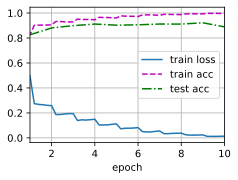

In [9]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 小结

* 学习嵌套函数（nested function）是训练神经网络的理想情况。在深层神经网络中，学习另一层作为恒等映射（identity function）较容易（尽管这是一个极端情况）。
* 残差映射可以更容易地学习同一函数，例如将权重层中的参数近似为零。
* 利用残差块（residual blocks）可以训练出一个有效的深层神经网络：输入可以通过层间的残余连接更快地向前传播。
* 残差网络（ResNet）对随后的深层神经网络设计产生了深远影响，无论是卷积类网络还是全连接类网络。


## 练习

1. :numref:`fig_inception` 中的Inception块与残差块之间的主要区别是什么？在删除了Inception块中的一些路径之后，它们是如何相互关联的？
1. 参考 ResNet 论文 :cite:`He.Zhang.Ren.ea.2016` 中的表 1，以实现不同的变体。
1. 对于更深层次的网络，ResNet 引入了“bottleneck”架构来降低模型复杂性。请你试着去实现它。
1. 在 ResNet 的后续版本中，作者将“卷积层、批量归一化层和激活层”结构更改为“批量归一化层、激活层和卷积层”结构。请你做这个改进。详见 :cite:`He.Zhang.Ren.ea.2016*1` 中的图 1。
1. 为什么即使函数类是嵌套的，我们仍然要限制增加函数的复杂性呢？


[Discussions](https://discuss.d2l.ai/t/1879)
